In [1]:
######################################################################
# Semi-Supervised Classification of Graph Nodes using Exponential Decay
# L42: Assessment 2
# Jan Ondras (jo356), Trinity College
######################################################################
#############################################################################################################
# Generate new feature matrices depending on decay constant LAMBDA; PUBMED DATASET
# DONE for all three ranges below
#############################################################################################################

import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import time
from gcn.utils import *

dataset_type = 'pubmed'

# Load data
adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask = load_data(dataset_type)
features = features.toarray() # dense feature matrix

if dataset_type == 'pubmed':
    N_classes = 3
    N_features = 500
    N_nodes = 19717
    N_edges = 44327 #44338 - incorrect in GCN paper !
#     print adj.toarray().diagonal()[:50], np.sum(adj.toarray().diagonal())
    if (N_classes != y_train.shape[1] or N_features != features.shape[1] or N_nodes != features.shape[0] 
            or N_edges != (np.sum(adj.toarray().diagonal()) + np.sum(adj.todense()))/2. ):
#         print y_train.shape[1], features.shape[1], features.shape[0]
        raise ValueError("Dataset dimensions differ from expected!")
else:
    raise ValueError("Dataset not supported!")
print dataset_type, "dataset:", "#classes =", N_classes, ", #features =", N_features, ", #nodes =", N_nodes, ", #edges =", N_edges

# Construct graph
G = nx.from_scipy_sparse_matrix(adj) # or nx.Graph(adj)
print "#nodes and #edges in created graph = ", G.number_of_nodes(), G.number_of_edges()
# Get lengths of shortest paths between all pairs of connected nodes
all_SP_lengths = dict(nx.all_pairs_shortest_path_length(G)) # dictionary of dict[source][targer] = length

lambdas = [0.25, 0.5, 0.75, 1.,2.,3.,4.,5.,6.,7., 8., 9., 10., 15., 20., 25., 30., 50., 100., 500., 1000.]
lambdas = lambdas+[1.5, 2.5, 3.5, 4.5, 5.5, 35., 40., 45., 200., 300., 400.]
lambdas = lambdas+[1.25, 1.75, 2.25, 2.75]

lambdas = [0.25, 0.5, 0.75, 1., 1.25, 1.5, 1.75, 2.0]

for LAMBDA in lambdas:
    
    st = time.time()
    # Create new feature matrix (X) using Exponentially Decaying Node Importance
    X = np.zeros((N_nodes, N_features), dtype=np.float)
    for (source,d) in all_SP_lengths.items():
        for (target,length) in d.items():
            X[source] += features[target] * np.exp(-length/LAMBDA)
    print "Time taken: ", time.time()-st, (time.time()-st)/60.  #  ~ 1min on my CPU
    
    np.savez('./../../../Dataset/Features_PubMed/f_' + str(LAMBDA) + '_.npz', X=X, LAMBDA=LAMBDA)

pubmed dataset: #classes = 3 , #features = 500 , #nodes = 19717 , #edges = 44327
#nodes and #edges in created graph =  19717 44327


KeyboardInterrupt: 

In [3]:
# # ALTERNATIVE ... a little bit slower
# st = time.time()
# # i = 0
# all_SP_lengths = dict(nx.all_pairs_shortest_path_length(G))
# print all_SP_lengths[0][0] == 0
# #Create new feature matrix (X) using Exponentially Decaying Node Importance
# XX = np.zeros((N_nodes, N_features), dtype=np.float)
# for source in range(N_nodes):
#     for (target,length) in all_SP_lengths[source].items():
#         XX[source] += features[target] * np.exp(-TAU*length)
# #     i +=1
# #     print i
# print "Time taken: ", time.time()-st # Time taken:  2700.41813493

True


TypeError: invalid shape

In [4]:
# Get maximal path length 
MAX_PATH_LEN = 0
max_path_lengths = []
all_SP_lengths_gen = nx.all_pairs_shortest_path_length(G)
for (_,d) in all_SP_lengths_gen:                  # Can iterate over generator only ONCE !
    max_path_lengths.append(np.max(d.values()))
MAX_PATH_LEN = np.max(max_path_lengths)
print "Maximal path length =", MAX_PATH_LEN

Maximal path length = 19


In [50]:
print features.todense().shape # todense() returns matrix ! 
for r in features.toarray():
#     print r.shape
    for x in r:
#         print x
        if x != 1.0 and x != 0.0:
            print "other value, non-binary"
# ONLY BINARY FEATURE VALUES ARE PRESENT !!!

(2708, 1433)


In [37]:
# REDO for each lambda
print "Max and Min feature value in new feature set", np.max(X), np.min(X)

Max and Min feature value in new feature set 186.826730194 0.0


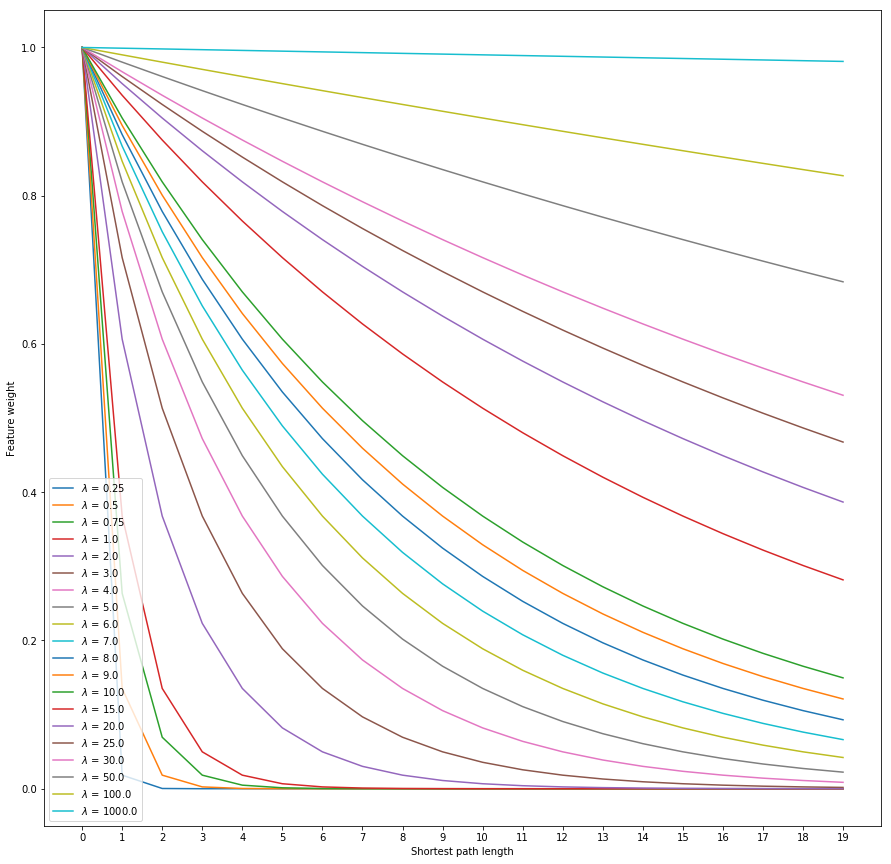

In [49]:
MAX_PATH_LEN = 19 # for Cora
SPL_range = np.arange(MAX_PATH_LEN+1)
lambdas = [0.25, 0.5, 0.75, 1.,2.,3.,4.,5.,6.,7., 8., 9., 10., 15., 20., 25., 30., 50., 100., 1000.]
plt.figure(figsize=(15,15))
for l in lambdas:
    plt.plot(np.exp(-SPL_range/l), label='$\lambda$ = '+str(l))

plt.xticks(SPL_range, SPL_range)
plt.xlabel('Shortest path length')
plt.ylabel('Feature weight')
plt.legend()
plt.show()